In [27]:
!pip install keras==2.0

  Using cached https://files.pythonhosted.org/packages/fc/08/8b927337b7019c374719145d1dceba21a8bb909b93b1ad6f8fb7d22c1ca1/tensorflow_estimator-2.0.1-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/76/54/99b9d5d52d5cb732f099baaaf7740403e83fe6b0cedde940fabd2b13d75a/tensorboard-2.0.2-py3-none-any.whl
  Created wheel for keras: filename=Keras-2.0.0-cp37-none-any.whl size=227991 sha256=ace446f75a338f89d97bc602786606e880ef30ad7c57ff50e47cedc354231471
  Stored in directory: C:\Users\sridhar\AppData\Local\pip\Cache\wheels\b0\a1\f4\f5f6a53dd71728cae0176b860f8c4304dd5d3fc2b8387ef59c
Successfully built keras
  Found existing installation: tensorflow-estimator 2.1.0
    Uninstalling tensorflow-estimator-2.1.0:
      Successfully uninstalled tensorflow-estimator-2.1.0
  Found existing installation: tensorboard 2.1.1
    Uninstalling tensorboard-2.1.1:
      Successfully uninstalled tensorboard-2.1.1


In [28]:
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
from keras.layers import Dense
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

Using TensorFlow backend.


In [29]:
#open the file as read only
h5f = h5py.File('C:/Users/sridhar/Downloads/SVHN_single_grey1.h5', 'r')

In [30]:
# Load the training, test and validation set
X_train = h5f['X_train'][:]
y_train = h5f['y_train'][:]
X_test = h5f['X_test'][:]
y_test = h5f['y_test'][:]

In [31]:
h5f.close

<bound method File.close of <HDF5 file "SVHN_single_grey1.h5" (mode r)>>

In [32]:
print("X_train shape:", X_train.shape)
print("y_train1 shape:", y_train1.shape)
print("X_test shape:", X_test.shape)
print("y_test1 shape:", y_test1.shape)

X_train shape: (42000, 32, 32)
y_train1 shape: (42000,)
X_test shape: (18000, 32, 32)
y_test1 shape: (18000,)


# Let's visualize our dataset

In [33]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (16.0, 4.0)

6   7   4   4   0   3   0   7   3   1   
0   1   3   1   1   0   0   8   4   6   
5   7   9   1   0   3   0   7   2   1   
1   0   2   9   0   2   5   1   3   2   
7   9   8   4   9   4   5   9   3   4   
0   5   5   8   3   6   6   0   0   6   
8   8   3   1   4   7   0   2   9   4   
8   7   3   9   4   4   3   3   4   4   
8   6   8   7   4   0   4   4   4   1   
4   2   7   4   2   9   1   9   1   0   


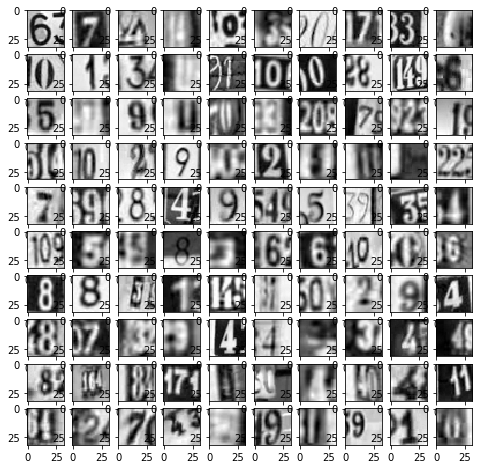

In [34]:
columns=10
rows=10

fig=plt.figure(figsize=(8, 8))

for i in range(1,columns*rows+1):
  img=X_train[i]
  fig.add_subplot(rows,columns,i)
  print(y_train1[i],end='   ')
  if i % columns == 0:
    print ("")
  plt.imshow(img,cmap='gray')

plt.show()

In [35]:
X_train = X_train.reshape(X_train.shape[0], 1024)
X_test = X_test.reshape(X_test.shape[0], 1024)

# # normalize inputs from 0-255 to 0-1
X_train = X_train / 255.0
X_test = X_test / 255.0

print('Training set', X_train.shape, y_train.shape)
print('Test set', X_test.shape, y_test.shape)

Training set (42000, 1024) (42000,)
Test set (18000, 1024) (18000,)


In [36]:
from keras.utils import np_utils
y_train_labels = np_utils.to_categorical(y_train)
y_test_labels = np_utils.to_categorical(y_test)

In [37]:
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow import keras

In [38]:
model = keras.models.Sequential()

model.add(keras.layers.BatchNormalization(input_shape = (1024,)))  ### Batch_Norm Layer

model.add(keras.layers.Flatten())

#model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(100,activation='relu'))


model.add(keras.layers.Dense(100,activation='relu'))

model.add(keras.layers.Dense(100,activation='relu'))

model.add(keras.layers.Dense(10, activation='softmax'))
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [39]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 1024)              4096      
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               102500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1010      
Total params: 127,806
Trainable params: 125,758
Non-trainable params: 2,048
______________________________________________

In [40]:
model.fit(X_train, y_train_labels, batch_size=200, epochs=10, validation_split=0.2)

Train on 33600 samples, validate on 8400 samples
Epoch 1/10
33600/33600 [==============================] - 6s 178us/sample - loss: 1.5365 - accuracy: 0.4834 - val_loss: 1.3668 - val_accuracy: 0.6429
Epoch 2/10
33600/33600 [==============================] - 2s 70us/sample - loss: 0.9539 - accuracy: 0.7027 - val_loss: 0.9132 - val_accuracy: 0.7358
Epoch 3/10
33600/33600 [==============================] - 2s 69us/sample - loss: 0.7994 - accuracy: 0.7552 - val_loss: 0.8323 - val_accuracy: 0.7449
Epoch 4/10
33600/33600 [==============================] - 2s 74us/sample - loss: 0.7249 - accuracy: 0.7762 - val_loss: 0.7653 - val_accuracy: 0.7658
Epoch 5/10
33600/33600 [==============================] - 3s 75us/sample - loss: 0.6731 - accuracy: 0.7926 - val_loss: 0.7130 - val_accuracy: 0.7881
Epoch 6/10
33600/33600 [==============================] - 2s 69us/sample - loss: 0.6187 - accuracy: 0.8068 - val_loss: 0.6968 - val_accuracy: 0.7923
Epoch 7/10
33600/33600 [==============================] 

In [41]:
y_pred=model.predict_classes(X_test)

In [42]:
#Accuracy for DNN model - first variant
accuracy_score(y_test,y_pred)

0.8105

In [43]:
from sklearn.metrics import confusion_matrix,fbeta_score,classification_report
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1462   56   20   21   52   15   54   33   24   77]
 [  18 1543   24   27   75   25   20   54   16   26]
 [  11   39 1452   38   47   19    9  111   29   48]
 [  20   47   49 1288   33  128   25   50   35   44]
 [  16   54   29   13 1585   13   26   18   18   40]
 [  18   19   11   89   25 1401   76   18   43   68]
 [  39   29    8   25   74   47 1475   16   95   24]
 [  12   69   36   18   23   17    9 1593    9   22]
 [  26   57   29   48   50   44  125   22 1335   76]
 [  44   48   32   33   40   50   27   39   36 1455]]


In [44]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.81      0.84      1814
           1       0.79      0.84      0.81      1828
           2       0.86      0.81      0.83      1803
           3       0.81      0.75      0.78      1719
           4       0.79      0.87      0.83      1812
           5       0.80      0.79      0.79      1768
           6       0.80      0.81      0.80      1832
           7       0.82      0.88      0.85      1808
           8       0.81      0.74      0.77      1812
           9       0.77      0.81      0.79      1804

    accuracy                           0.81     18000
   macro avg       0.81      0.81      0.81     18000
weighted avg       0.81      0.81      0.81     18000

